# Updates

If you go to hierarchical regression menu and see items "[c](#ppconf)" and "[d](#vvconf)", you'll see that perceptual confidence in a previous trial leaks to currect one as well as value-based one leaks to a current value-based one. I think what it is quite impressive is when trying to predict value-based confidence by value-based confidence in previous trial, even perceptual's confidence's (in the previous trial) effect is signitificant. 

I believe this is may be good manifestation (although not conclusive) of the idea that confidence has a dualistic property - tonic/phasic.

In Models, at the item [h](#pibic), you'll see that individual BIC values of participants in a violin plot. As you can see the variance is not due to outliers. 

If you click on Models, item [k](#ndl), you'll see that lambda increases learning rate decreases which make sense (I know it is double-dipping, did it only for visualizing purposes) since lambda 1 means no decay and 0 is maximum decay. Which is to say, as participants have higher learning rate (i.e., they think they are in a highly volatile environment and they update their knowledge  frequently), they have a  tendency to ignore counter-factual option more often).

I also tried to fit a model in which the value of unchosen deck is determined in a temporal way (i.e., Vunchosen(i) = (lamda x Vunchosen(i) + lambda x Vunchosen(i-1) ) / 2 ) It didn't work.

You also asked me to look for the person with high beta (high exploitation), basically, he win two out of three times (which is quite a success in this task), even though when she choose wrong deck. In other words, she was just lucky and so keep exploiting the orange deck.

Finally, you asked me to look whether response time decreases over time. Although I didn't plot it here, there is a general trend in which response time decreases through first 50 trials and afterwards (for 250 trials) it can be said to be stable.



<a id='content'></a>
# Content

## Models
### a) [Rescorla_Wagner and Rescorla-Wagner with Decay Parameter](#rw)
### b) [Model 1](#M1)
### c)  [Model 2](#M2)
### d)  [Model 3](#M3)
### e) [Model 4](#M4)
### f) [Plotting of BIC Values](#pm)
### g) [Bayes Factor Calculation](#bfc)
### h) [Plotting of Individual BIC Values](#pibic)
### i) [Negative Correlation Between Beta and Learning Rate](#ncbbl)
### j) [Negative Correlation Between Learning Rate and Leak Parameter When Model 3 is selected](#M3e)
### k) [Negative Correlation Between Decay and Learning Rate in RW Model With Decay Parameter](#ndl)

## Model and DDM Interactions
### [Correlation Between Learning Rate in Model 2 and Drift Rate](#cldr)

## Hierarchical Regressions
### a) [Model to Predict Value-Based Confidence Task](#valconf)
### b) [Model to Predict Perceptual Confidence by Value-Based Confidence in Previous Trial](#perconf)
### c) [Model to Predict Perceptual Confidence by Perceptual Confidence in Previous Trial](#ppconf)
### d) [Model to Predict Value-Based Confidence by Value-Based Confidence in Previous Trial](#vvconf)
### e) [Model to Predict Choice of Correct Deck](#rightd)

## Hierarchical Drift Diffusion Model Estimates
### a) [HDDM - Beta as a Free Parameter](#a)
### b) [HDDM - Beta as a Fixed Parameter](#hddm_f)


# Models

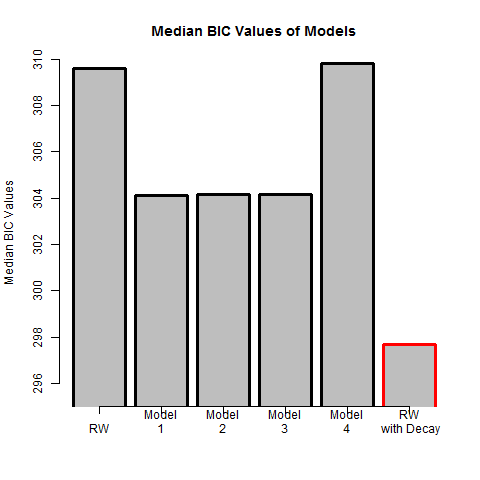

In [146]:
%%R
bic_med_values <- c(309.6,304.1,304.15,304.15,309.8, 297.7) # BIC values which are retrieved from MATLAB

par(lwd = 3)
bar <- barplot(bic_med_values, col="gray",  
               border = c("black", "black", "black", "black", "black", "red"), axes = T,
        ylab='Median BIC Values',cex.names=0.8, main='Median BIC Values of Models', ylim=c(295,310), xpd = FALSE)
axis(1, at=bar, lty =1, labels = c("RW", "Model\n1", "Model\n2","Model\n3", "Model\n4", "RW\n with Decay"))


# [Back to Content](#content)

<a id='rw'></a>

# Rescorla- Wagner: 
## Vo(i+1) = Vo(i) + (r-Vo(i)) * α 
#### Mean BIC Level: 284.7
#### Median BIC Level: 309.6
#### Sum of BIC Levels: 11390

# Rescorla-Wagner with Decay Parameter
## Vo(i+1) = Vo(i) + (r-Vo(i)) * α 
## Vb(i+1) = Vb(i) * λ
#### Mean BIC Level: 264,6
#### Median BIC Level: 292.7
#### Sum of BIC Levels: 10585

# [Back to Content](#content)

<a id='M1'></a>

# Model 1: 
## Vo(i+1) = Vo(i) + (r-Vo(i)) x (α/(1+ (θ x Value-Based Confidence) 
## Vb(i+1) = Vb(i) * λ (Update of Blue Deck When Orange Deck is chosen)

#### Mean BIC Level:   274.6
#### Median BIC Level: 304.1
#### Sum of BIC Levels: 10986


# [Back to Content](#content)

<a id='M2'></a>

# Model 2: 
## Vo(i+1) = Vo(i) + (r-Vo(i)) x (α/(1+ (θ x (Value-Based Confidence+ Perceptual Confidence)) 
## Vb(i+1) = Vb(i) x λ (Update of Blue Deck When Orange Deck is chosen)

#### Mean BIC Level:   274.9
#### Median BIC Level: 304.15
#### Sum of BIC Levels: 10997


# [Back to Content](#content)

<a id='M3'></a>

# Model 3: 
## Vo(i+1) = Vo(i) + (r-Vo(i)) x (α/(1+ (γ x Perceptual Confidence)) 
## Vb(i+1) = Vb(i) x λ (Update of Blue Deck When Orange Deck is chosen)

#### Mean BIC Level:     275.6
#### Median BIC Level:  304,15
#### Sum of BIC Levels: 11024


# [Back to Content](#content)

<a id='M4'></a>

# Model 4: 
## Vo(i+1) = Vo(i) + (r-Vo(i)) x (α/(1+ (θ x Value-Based Confidence + γ x Perceptual Confidence)) 
## Vb(i+1) = Vb(i) x λ (Update of Blue Deck When Orange Deck is chosen)

#### Mean BIC Level:     280.02
#### Median BIC Level:  309.80
#### Sum of BIC Levels: 11201


# [Back to Content](#content)

<a id='pm'></a>
# Plotting BIC Values

##  Model 1 and 2 seem to be best models - Model 1 is non-significantly better than Model 2 (or 3) since a Bayes Factor of 1.02 is considered to be weak evidence in favor of Model 1.

## Model RW with a decay parameter is clearly better than the other.

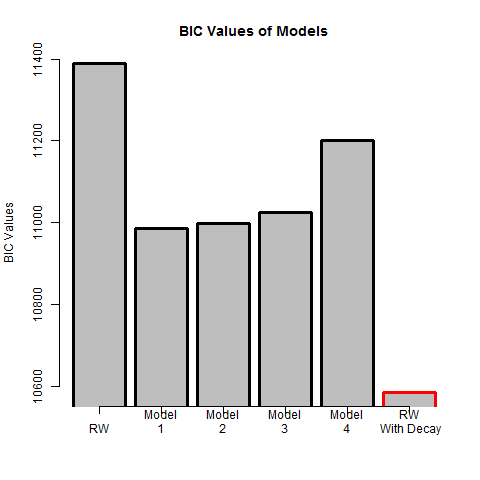

In [148]:
%%R
bic_values <- c(11390,10986,10997,11024,11201, 10585) # BIC values which are retrieved from MATLAB

par(lwd = 3)
bar <- barplot(bic_values, col="gray",  
               border = c("black", "black", "black", "black", "black", "red"), axes = T,
        ylab='BIC Values',cex.names=0.8, main='BIC Values of Models', ylim=c(10550,11400), xpd = FALSE)
axis(1, at=bar, lty =1, labels = c("RW", "Model\n1", "Model\n2","Model\n3", "Model\n4", "RW\n With Decay"))


# [Back to Content](#content)

<a id='bfc'></a>

## Bayes Factor Calculation:

In [156]:
Bayes_Factor = exp( (-1/2) * (292.7-309.6)) # calculating Bayes Factor, 309.6 is median of BIC values of RW 
# whereas 292.7 is median of RW with decay parameters.
print(Bayes_Factor)

4675.07273551


Since a Bayes Factor more than 10 is considered as strong evindence for proposed model, model RW with decay parameters is a much better fit than Rescorla Wagner

# [Back to Content](#content)

<a id='pibic'></a>

# Plotting of Individual BIC Values

As you can see in the violin plot below, BIC Values(of Rescorla-Wagner and modified version of RW with decay parameter) are clustured around 350 however the variability isn't caused by outliers ( since at values like 100 to 200, there are fairly high high numbers of participants).

In [47]:
%%R 
BIC <- readMat('BIC.mat')
BIC <- BIC$BIC
BIC_RW <- readMat('BIC_RW.mat')
BIC_RW <- BIC_RW$BIC
BIC_3 <- readMat('BIC_3.mat')
BIC_3 <- BIC_3$BIC

In [48]:
%R -o BIC_RW

In [49]:
%R -o BIC

In [50]:
%R -o BIC_3

In [51]:
BIC_rw = BIC_RW[:,0]
BIC = BIC[:,0]
BIC_3 = BIC_3[:,0]
d = {'Rescorla-Wagner\n BIC' : BIC_rw, 'Model with Lambda \n BIC' : BIC, 'Model 3\n BIC' : BIC_3}
BIC_df = pd.DataFrame(data = d)

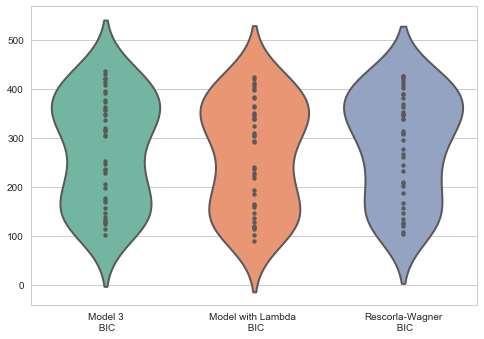

In [52]:
sns.set(style="whitegrid")
sns.violinplot(data=BIC_df, palette="Set2", inner="points", linewidth=2)


<a id='ndl'></a>
# Negative Correlation Between Decay and Learning Rate in RW Model With Decay Parameter]

Lambda = 1 is minimum decay, lambda = 0 is maximum decay.

Although we said it is double-dipping and won't use it, just by inspecting visually; we can say that as learning rate gets higher, lambda decreases.

Which is to say - as participants have higher learning rate (i.e., they think they are in a highly volatile environment and they update their knowledge  frequently), they have a  tendency to ignore counter-factual option more often).

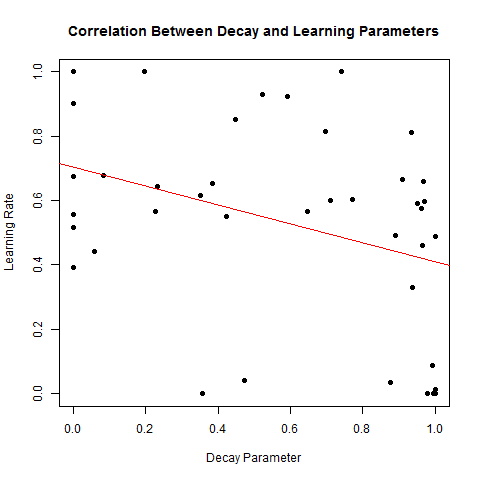

In [158]:
%%R
learning <- readMat('paramets.mat')
fit <- lm(learning$paramets[,2] ~ learning$paramets[,6])
plot(learning$paramets[,6], learning$paramets[,2],col ='black', pch=19, xlab='Decay Parameter', ylab = 'Learning Rate', main = 'Correlation Between Decay and Learning Parameters')
abline(fit, col= 'red')

<a id='ncbbl'></a>
# Negative Correlation Between Beta and Learning Rate in Model 2


Corr = - 0.44, p = 0.004. It makes sense since lower beta (inverse temperature) indicates higher exploration instead of exploitation. A subject who is prone to explore instead of exploit is expected to have a higher learning rate since her environment won't be volatile.

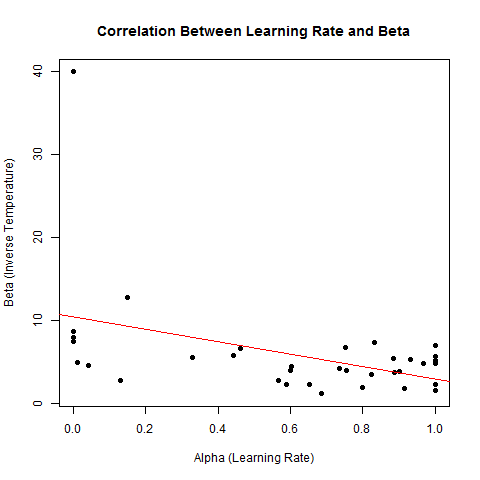

In [17]:
%%R 
 # upload parameter estimates of the model
fit <-  lm(learning$paramets[,1] ~ learning$paramets[,2]) # regress beta on learning rate
plot(learning$paramets[,2], learning$paramets[,1], main='Correlation Between Learning Rate and Beta',
     xlab='Alpha (Learning Rate)', ylab='Beta (Inverse Temperature)', pch=19)
abline(fit, col='red') # plot the fit

# [Back to Content](#content)

<a id='M3e'></a>

# Negative Correlation Between Learning Rate and Leak Parameter When Model 3 is selected

Although not significant - corr = -0.3, p = 0.06 - when model 3 is implemented a negative correlation between learning rate and leak parameter indicates that people who leak their high confidence from one task to another won't update their knowledge much but rely on their prior beliefs.

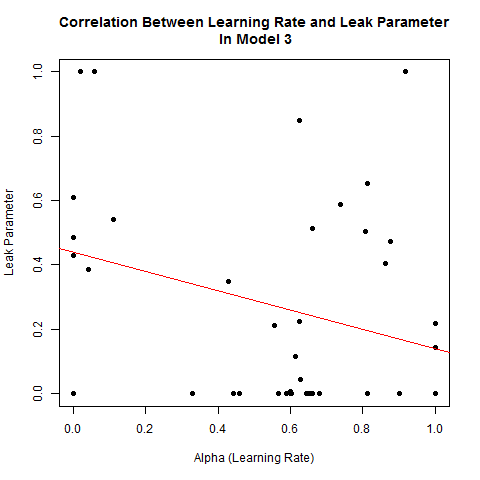

In [23]:
%%R 
learning <- readMat('paramets.mat') # upload parameter estimates of the modeol
fit <-  lm(learning$paramets[,5] ~ learning$paramets[,2])
plot(learning$paramets[,2], learning$paramets[,5], main='Correlation Between Learning Rate and Leak Parameter\n In Model 3',
     xlab='Alpha (Learning Rate)', ylab='Leak Parameter', pch=19)
abline(fit, col='red')

# Indeed, When model 4 is implemented negative correlation is significant

corr= -0.42, p = 0.007 

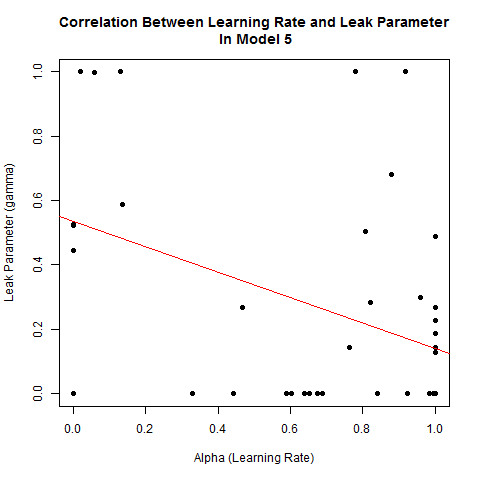

In [21]:
%%R
learning <- readMat('paramets.mat') # upload parameter estimates of the modeol
fit <-  lm(learning$paramets[,3] ~ learning$paramets[,2])
plot(learning$paramets[,2], learning$paramets[,3], main='Correlation Between Learning Rate and Leak Parameter\n In Model 5',
     xlab='Alpha (Learning Rate)', ylab='Leak Parameter (gamma)', pch=19)
abline(fit, col='red')

<a id='cldr'></a>
# Correlation Between Learning Rate in Model 2 and Drift Rate in Value-Based Task

Correlation between learning rate and drift rate - corr 0.41, p = 0.009 - indicates that subjects has higher learning rate (update their information more rapidly), they also collect evidence faster. 

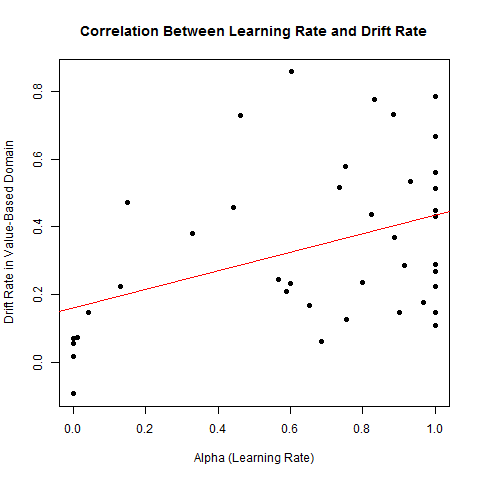

In [15]:
%%R 
learning <- readMat('paramets.mat') # upload parameter estimates of the modeol
fit <-  lm(ddm_v_wb[45:84,2] ~ learning$paramets[,2]) # regress drift rate on learning rate
plot(learning$paramets[,2], ddm_v_wb[45:84,2], main='Correlation Between Learning Rate and Drift Rate',
     xlab='Alpha (Learning Rate)', ylab='Drift Rate in Value-Based Domain', pch=19)
abline(fit, col='red') # plot the fit

# [Back to Content](#content)

<a id='valconf'></a>

# Model to Predict Value-Based Confidence

In [7]:
%%R 
fit <- lmer(z_V_Conf ~ 0 + z_P_Conf + z_V_Rt + z_P_Conf:z_V_Rt +
            (0 + z_P_Conf + z_V_Rt +z_P_Conf:z_V_Rt|participant), data=dat, 
            control=lmerControl(optimizer="optimx",
                                           optCtrl=list(method='nlminb')))

coefs <- data.frame(coef(summary(fit)))

df.KR <- get_ddf_Lb(fit, fixef(fit))

coefs$df.KR <-(rep(df.KR, each=3))

coefs$semax <- coefs$Estimate + (coefs$Std..Error)
coefs$semin <- coefs$Estimate - (coefs$Std..Error)

coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

In [8]:
%%R
summary(fit)

In [11]:
%R -o coefs
conf_table_exp1 = coefs
conf_table_exp1.columns = ['coefficient', 'se', 'defr', 't', 'prt', 'DF', 'CImax', 'CImin', 'p', 'p2']
conf_table_exp1 = conf_table_exp1.iloc[:, 0:-1].copy(); conf_table_exp1.loc[:, 'SEmax'] = conf_table_exp1['coefficient'] + conf_table_exp1['se']*2
conf_table_exp1.loc[:, 'SEmin'] = conf_table_exp1['coefficient'] - conf_table_exp1['se']*2
conf_table_exp1 = conf_table_exp1.transpose()
conf_table_exp1.columns = [ 'z_P_Conf', 'z_V_Rt', 'z_P_Conf:z_V_Rt']
conf_table_exp1.loc['p'] = np.round(conf_table_exp1.loc['p'], 5)
conf_table_exp1 = conf_table_exp1[[ 'z_P_Conf', 'z_V_Rt', 'z_P_Conf:z_V_Rt']]
conf_table_exp1 = conf_table_exp1.drop(['defr', 'prt'])
conf_table_exp1.columns = ['Perceptual Confidence', 'Value-Based Response Time', 'Perceptual Confidence x Value-Based RT']
conf_table_exp1

,Perceptual Confidence,Value-Based Response Time,Perceptual Confidence x Value-Based RT
coefficient,0.105205,-0.122095,-0.017348
se,0.029798,0.023199,0.011673
t,3.530621,-5.262898,-1.486198
DF,43.015214,43.015214,43.015214
CImax,0.135003,-0.098896,-0.005675
CImin,0.075407,-0.145295,-0.029021
p,0.001000,0.000000,0.144520
SEmax,0.164801,-0.075697,0.005998
SEmin,0.045609,-0.168494,-0.040694


# Coefficient Table for Predicting Value-Based Confidence

Coefficients which are written in red are statistically significant.

[None, None]

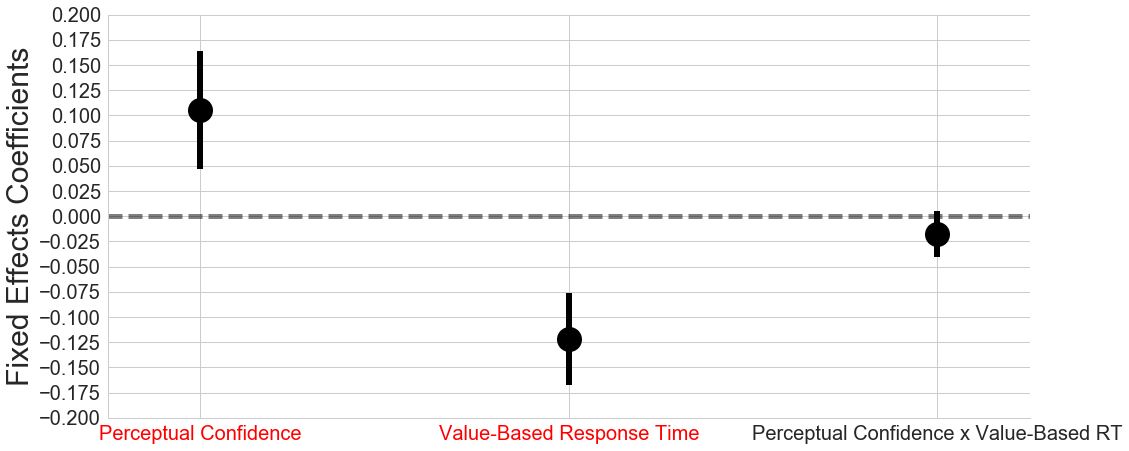

In [12]:
Coefpresplot(conf_table_exp1, title='', intercept=True, ticklabsize=15, size='big', ylimits=(-0.2, 0.2), ymultiple = (0.025))
[i.set_color('#ff0000') for i in plt.gca().get_xticklabels()[0:2]]

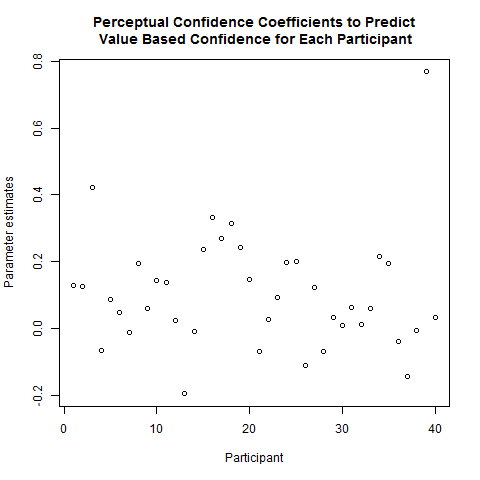

In [12]:
%%R
pc <- ranef(fit)$participant[, "z_P_Conf"] + fixef(fit)[1]
plot(pc, main='Perceptual Confidence Coefficients to Predict\n Value Based Confidence for Each Participant'
     , xlab='Participant', ylab= 'Parameter estimates')

# [Back to Content](#content)

<a id='perconf'></a>

# Model to Predict Perceptual Confidence by Value-Based Confidence in Previous Trial

In [13]:
%%R 
j <- 1
i <- 1
while(j<=40){
    l <- length(dat$z_P_Conf[dat$participant==j])
    i <- 1
while(i<l){
    dat$z_P_Conf[dat$participant==j][i] <- dat$z_P_Conf[dat$participant==j][i+1]
    dat$z_P_Rt[dat$participant==j][i] <- dat$z_P_Rt[dat$participant==j][i+1]
    i <- i +1
}
    if(i==l){
        dat$z_P_Conf[dat$participant==j][l] <- NA
        dat$z_P_Rt[dat$participant==j][l] <- NA
    }
    j <- j + 1
}

dat <- dat[rowSums(is.na(dat)) == 0,]

In [14]:
%%R 
fit <- lmer(z_P_Conf ~ 0 + z_V_Conf + z_V_Rt + z_P_Rt +
            (0 + z_V_Conf + z_V_Rt + z_P_Rt|participant), data=dat, 
            control=lmerControl(optimizer="optimx",
                                           optCtrl=list(method='nlminb')))

coefs <- data.frame(coef(summary(fit)))

df.KR <- get_ddf_Lb(fit, fixef(fit))

coefs$df.KR <-(rep(df.KR, each=3))

coefs$semax <- coefs$Estimate + (coefs$Std..Error)
coefs$semin <- coefs$Estimate - (coefs$Std..Error)

coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

In [15]:
%%R
summary(fit)

In [16]:
%R -o coefs
conf_table_exp1 = coefs
conf_table_exp1.columns = ['coefficient', 'se', 'defr', 't', 'prt', 'DF', 'CImax', 'CImin', 'p', 'p2']
conf_table_exp1 = conf_table_exp1.iloc[:, 0:-1].copy(); conf_table_exp1.loc[:, 'SEmax'] = conf_table_exp1['coefficient'] + conf_table_exp1['se']*2
conf_table_exp1.loc[:, 'SEmin'] = conf_table_exp1['coefficient'] - conf_table_exp1['se']*2
conf_table_exp1 = conf_table_exp1.transpose()
conf_table_exp1.columns = [ 'z_V_Conf', 'z_V_Rt', 'z_P_Rt']
conf_table_exp1.loc['p'] = np.round(conf_table_exp1.loc['p'], 5)
conf_table_exp1 = conf_table_exp1[[ 'z_V_Conf', 'z_V_Rt', 'z_P_Rt']]
conf_table_exp1 = conf_table_exp1.drop(['defr', 'prt'])
conf_table_exp1.columns = ['Value-Based Confidence', 'Value-Based Response Time', 'Perceptual Response Time']
conf_table_exp1

,Value-Based Confidence,Value-Based Response Time,Perceptual Response Time
coefficient,0.066299,0.038239,-0.215193
se,0.017145,0.015582,0.035666
t,3.866988,2.454045,-6.033572
DF,41.694845,41.694845,41.694845
CImax,0.083444,0.053822,-0.179527
CImin,0.049154,0.022657,-0.250859
p,0.000380,0.018390,0.000000
SEmax,0.100589,0.069404,-0.143861
SEmin,0.032009,0.007075,-0.286525


# Coefficient Table for Predicting Perceptual Confidence

[None, None, None]

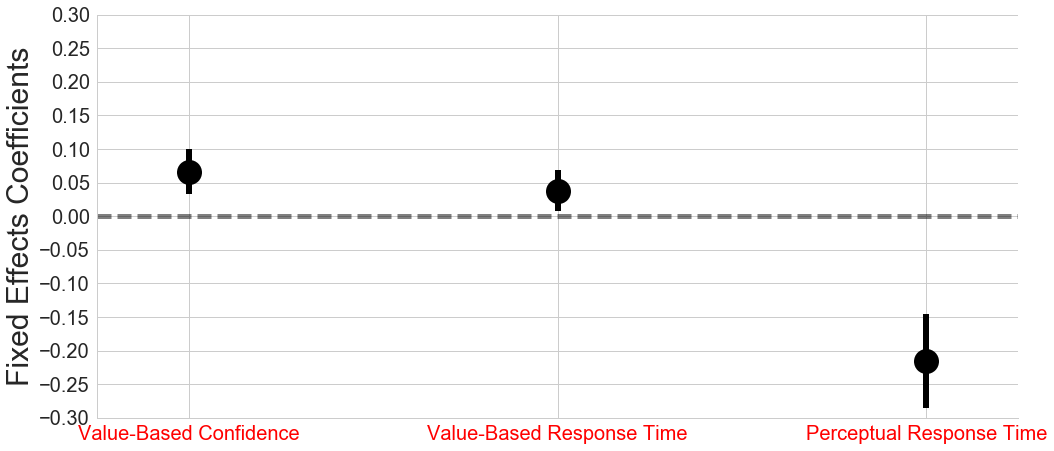

In [18]:
Coefpresplot(conf_table_exp1, title='', intercept=True, ticklabsize=15, size='big', ylimits=(-0.3, 0.3), ymultiple = (0.05))
[i.set_color('#ff0000') for i in plt.gca().get_xticklabels()[0:3]]

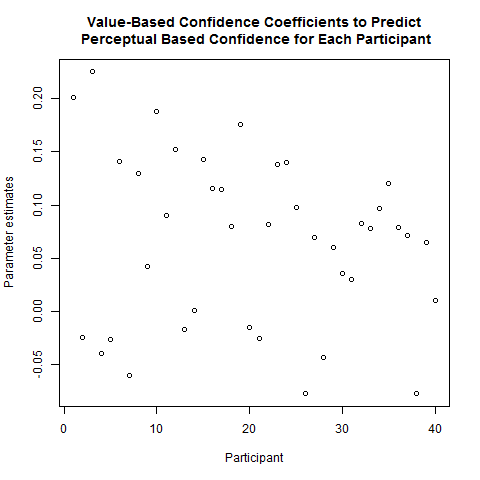

In [90]:
%%R
pc <- ranef(fit)$participant[, "z_V_Conf"] + fixef(fit)[1]
plot(pc, main='Value-Based Confidence Coefficients to Predict\n Perceptual Based Confidence for Each Participant'
     , xlab='Participant', ylab= 'Parameter estimates')

In [10]:
%R dat <- as.data.frame(read.csv('exp_final.csv', sep = ",", header = TRUE));

# [Back to Content](#content)

<a id='ppconf'></a>

# Model to Predict Perceptual Confidence by Perceptual Confidence In Previous Trial

As it is expected Perceptual Confidence is predicted by perceptual confidence in the previous trial as well as value-based confidence in previous trial.

In [10]:
%%R 
dat['z_P_Conf_Next'] <- 1
dat['z_P_Rt_Next'] <- 1

j <- 1
i <- 1
while(j<=40){
    l <- length(dat$z_P_Conf[dat$participant==j])
    i <- 1
while(i<l){
    dat$z_P_Conf_Next[dat$participant==j][i] <- dat$z_P_Conf[dat$participant==j][i+1]
    dat$z_P_Rt_Next[dat$participant==j][i] <- dat$z_P_Rt[dat$participant==j][i+1]
    i <- i +1
}
    if(i==l){
        dat$z_P_Conf_Next[dat$participant==j][l] <- NA
        dat$z_P_Rt_Next[dat$participant==j][l] <- NA
    }
    j <- j + 1
}

dat <- dat[rowSums(is.na(dat)) == 0,]

In [11]:
%%R 
fit <- lmer(z_P_Conf_Next ~ 0 + z_P_Conf  + z_V_Conf + z_P_Rt_Next +
            (0 + z_P_Conf + z_P_Rt_Next + z_V_Conf|participant), data=dat, 
            control=lmerControl(optimizer="optimx",
                                           optCtrl=list(method='nlminb')))
coefs <- data.frame(coef(summary(fit)))

df.KR <- get_ddf_Lb(fit, fixef(fit))

coefs$df.KR <-(rep(df.KR, each=3))

coefs$semax <- coefs$Estimate + (coefs$Std..Error)
coefs$semin <- coefs$Estimate - (coefs$Std..Error)

coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

In [12]:
%R -o coefs
conf_table_exp1 = coefs
conf_table_exp1.columns = ['coefficient', 'se', 'defr', 't', 'prt', 'DF', 'CImax', 'CImin', 'p', 'p2']
conf_table_exp1 = conf_table_exp1.iloc[:, 0:-1].copy(); conf_table_exp1.loc[:, 'SEmax'] = conf_table_exp1['coefficient'] + conf_table_exp1['se']*2
conf_table_exp1.loc[:, 'SEmin'] = conf_table_exp1['coefficient'] - conf_table_exp1['se']*2
conf_table_exp1 = conf_table_exp1.transpose()
conf_table_exp1.columns = [ 'z_P_Conf', 'z_V_Conf', 'z_P_Rt_Next']
conf_table_exp1.loc['p'] = np.round(conf_table_exp1.loc['p'], 5)
conf_table_exp1 = conf_table_exp1[[ 'z_P_Conf', 'z_V_Conf', 'z_P_Rt_Next']]
conf_table_exp1 = conf_table_exp1.drop(['defr', 'prt'])
conf_table_exp1.columns = ['Perceptual Confidence in Previous Trial', 'Value Confidence in Previous Trial', 'Perceptual Response Time']
conf_table_exp1

,Perceptual Confidence in Previous Trial,Value Confidence in Previous Trial,Perceptual Response Time
coefficient,0.178154,0.043975,-0.203362
se,0.019727,0.014251,0.033401
t,9.030738,3.085810,-6.088410
DF,50.016273,50.016273,50.016273
CImax,0.197881,0.058226,-0.169960
CImin,0.158426,0.029724,-0.236763
p,0.000000,0.003300,0.000000
SEmax,0.217609,0.072476,-0.136559
SEmin,0.138699,0.015474,-0.270165


[None, None, None]

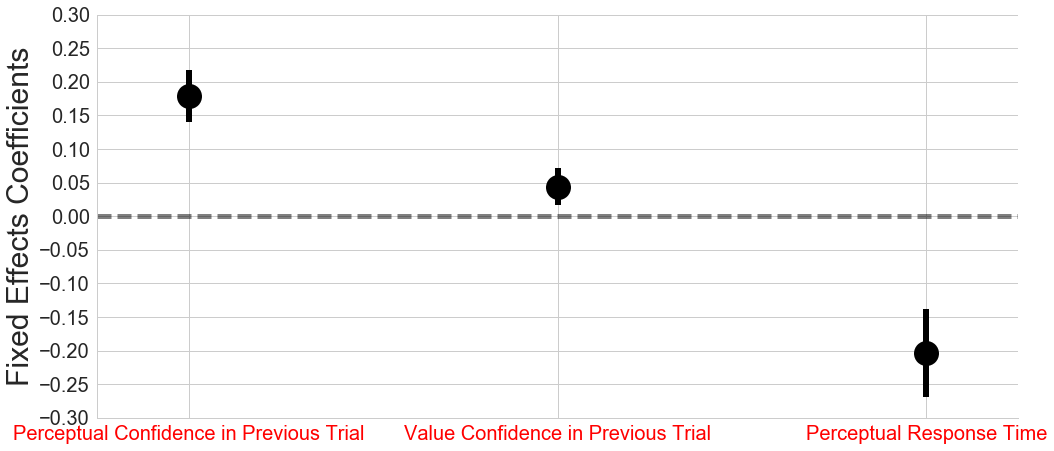

In [13]:
Coefpresplot(conf_table_exp1, title='', intercept=True, ticklabsize=15, size='big', ylimits=(-0.3, 0.3), ymultiple = (0.05))
[i.set_color('#ff0000') for i in plt.gca().get_xticklabels()[0:3]]

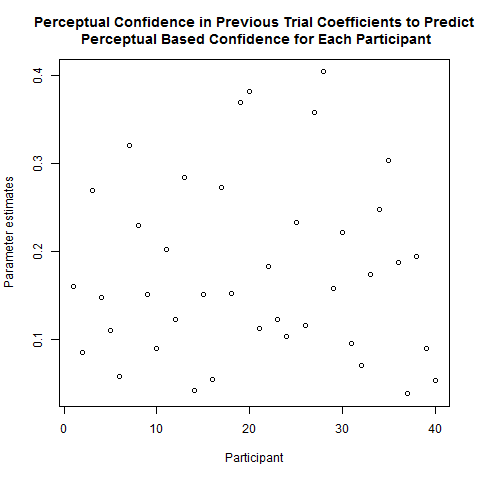

In [14]:
%%R
pc <- ranef(fit)$participant[, "z_P_Conf"] + fixef(fit)[1]
plot(pc, main='Perceptual Confidence in Previous Trial Coefficients to Predict\n Perceptual Based Confidence for Each Participant'
     , xlab='Participant', ylab= 'Parameter estimates')

In [23]:
%R dat <- as.data.frame(read.csv('exp_final.csv', sep = ",", header = TRUE));

# [Back to Content](#content)

<a id='vvconf'></a>

# Model to Predict Value-Based Confidence by Value-Based Confidence in Previous Trial

Value-Based Confidence is predicted by Perceptual confidence, Value-Based Confidence in Previous Trial and even Perceptual confidence in previous trial - which supports the idea that confidence as a tonic signal.

In [31]:
%%R 
dat['z_P_Conf_Next'] <- 1
dat['z_V_Conf_Next'] <- 1
dat['z_V_Rt_Next'] <- 1

j <- 1
i <- 1
while(j<=40){
    l <- length(dat$z_P_Conf[dat$participant==j])
    i <- 1
while(i<l){
    dat$z_V_Conf_Next[dat$participant==j][i] <- dat$z_V_Conf[dat$participant==j][i+1]
    dat$z_V_Rt_Next[dat$participant==j][i] <- dat$z_V_Rt[dat$participant==j][i+1]
    dat$z_P_Conf_Next[dat$participant==j][i] <- dat$z_P_Conf[dat$participant==j][i+1]
    i <- i +1
}
    if(i==l){
        dat$z_V_Conf_Next[dat$participant==j][l] <- NA
        dat$z_V_Rt_Next[dat$participant==j][l] <- NA
        dat$z_P_Conf_Next[dat$participant==j][l] <- NA
    }
    j <- j + 1
}

dat <- dat[rowSums(is.na(dat)) == 0,]

In [32]:
%%R 
fit <- lmer(z_V_Conf_Next ~ 0 + z_P_Conf_Next  + z_V_Conf + z_V_Rt_Next  + z_P_Conf + 
            (0 + z_P_Conf_Next +  z_V_Rt_Next + z_V_Conf|participant), data=dat, 
            control=lmerControl(optimizer="optimx",
                                           optCtrl=list(method='nlminb')))
coefs <- data.frame(coef(summary(fit)))

df.KR <- get_ddf_Lb(fit, fixef(fit))

coefs$df.KR <-(rep(df.KR, each=4))

coefs$semax <- coefs$Estimate + (coefs$Std..Error)
coefs$semin <- coefs$Estimate - (coefs$Std..Error)

coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

In [40]:
%R -o coefs
conf_table_exp1 = coefs
conf_table_exp1.columns = ['coefficient', 'se', 'defr', 't', 'prt', 'DF', 'CImax', 'CImin', 'p', 'p2']
conf_table_exp1 = conf_table_exp1.iloc[:, 0:-1].copy(); conf_table_exp1.loc[:, 'SEmax'] = conf_table_exp1['coefficient'] + conf_table_exp1['se']*2
conf_table_exp1.loc[:, 'SEmin'] = conf_table_exp1['coefficient'] - conf_table_exp1['se']*2
conf_table_exp1 = conf_table_exp1.transpose()
conf_table_exp1.columns = [ 'z_P_Conf_Next', 'z_V_Conf', 'z_V_Rt_Next', 'z_P_Conf']
conf_table_exp1.loc['p'] = np.round(conf_table_exp1.loc['p'], 5)
conf_table_exp1 = conf_table_exp1[[ 'z_P_Conf_Next', 'z_V_Conf', 'z_V_Rt_Next', 'z_P_Conf']]
conf_table_exp1 = conf_table_exp1.drop(['defr', 'prt'])
conf_table_exp1.columns = ['Perceptual Confidence', 'Value-Based Confidence\n in Previous Trial', 'Value-Based Response Time', 'Perceptual Confidence in\n Previous Trial']
conf_table_exp1

,Perceptual Confidence,Value-Based Confidence in Previous Trial,Value-Based Response Time,Perceptual Confidence in Previous Trial
coefficient,0.074964,0.366158,-0.096154,0.024758
se,0.026498,0.035652,0.017728,0.008346
t,2.829017,10.270287,-5.423898,2.966631
DF,41.057991,41.057991,41.057991,41.057991
CImax,0.101462,0.401810,-0.078427,0.033104
CImin,0.048466,0.330505,-0.113882,0.016413
p,0.007190,0.000000,0.000000,0.005000
SEmax,0.127960,0.437462,-0.060699,0.041450
SEmin,0.021967,0.294853,-0.131610,0.008067


[None, None, None, None]

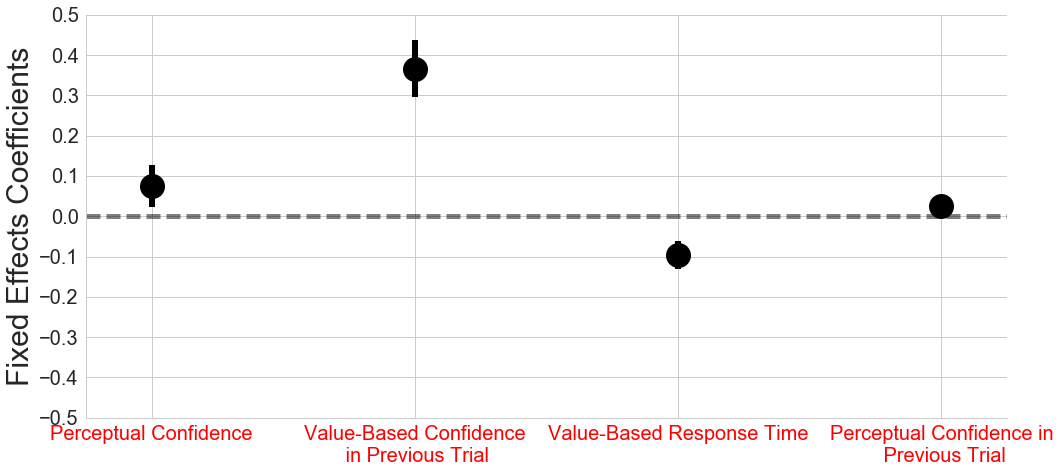

In [41]:
Coefpresplot(conf_table_exp1, title='', intercept=True, ticklabsize=15, size='big', ylimits=(-0.5, 0.5), ymultiple = (0.1))
[i.set_color('#ff0000') for i in plt.gca().get_xticklabels()[0:4]]

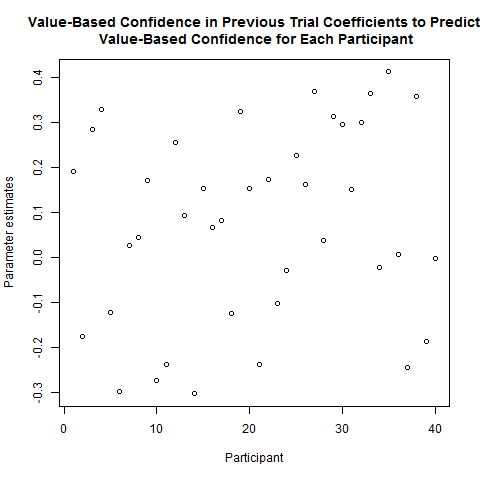

In [42]:
%%R
pc <- ranef(fit)$participant[, "z_V_Conf"] + fixef(fit)[1]
plot(pc, main='Value-Based Confidence in Previous Trial Coefficients to Predict\n Value-Based Confidence for Each Participant'
     , xlab='Participant', ylab= 'Parameter estimates')

In [43]:
%R dat <- as.data.frame(read.csv('exp_final.csv', sep = ",", header = TRUE));

# [Back to Content](#content)

<a id='rightd'></a>

# Model to Predict Choice of The Correct Deck



Predicting Correct Deck (One which has higher payoff probability)

In [31]:
%%R 
dat['correct_deck'] <- 5
dat$correct_deck[which((dat$chosen_deck == 1 & dat$deck_prob1 >= dat$deck_prob2) |
                         (dat$chosen_deck == 0 & dat$deck_prob2 > dat$deck_prob1))] <- 1
dat$correct_deck[which(dat$correct_deck != 1)] <- 0

fit_log_v <- glmer(correct_deck ~ 1 + z_V_Conf + z_P_Conf + z_V_Rt + z_P_Rt + z_V_Conf:z_V_Rt +
                   (1 +z_V_Conf + z_V_Conf:z_V_Rt + z_P_Conf + z_P_Rt + z_V_Rt|participant),
                data=dat, family = binomial(link="logit"))


In [32]:
%%R 
fix_1a <- fixef(fit_log_v)
fix_se_1a <- sqrt(diag(vcov(fit_log_v)))
names_1a <- names(fix_1a)

In [33]:
%R -o fix_1a -o fix_se_1a -o names_1a
choice_table_exp1 = regtable(fix_1a, fix_se_1a, names_1a)
choice_table_exp1
cols = ['(Intercept)', 'z_V_Conf', 'z_P_Conf', 'z_V_Rt', 'z_P_Rt', 'z_V_Conf:z_V_Rt']
choice_table_exp1 = choice_table_exp1[cols]
choice_table_exp1.columns = ['(Intercept)', 'Value-Based Confidence', 'Perceptual_Confidence', 'Value_Response Time',
                             'Perceptual Response Time', 'Value Confidence x Value Response Time']
choice_table_exp1

,(Intercept),Value-Based Confidence,Perceptual_Confidence,Value_Response Time,Perceptual Response Time,Value Confidence x Value Response Time
coefficient,0.728914,0.380557,0.016336,-0.112345,-0.044172,-0.074793
se,0.084256,0.049222,0.028790,0.031553,0.027801,0.027044
CImin,0.563773,0.284081,-0.040093,-0.174188,-0.098662,-0.127800
CImax,0.894055,0.477032,0.072765,-0.050501,0.010318,-0.021786


[None]

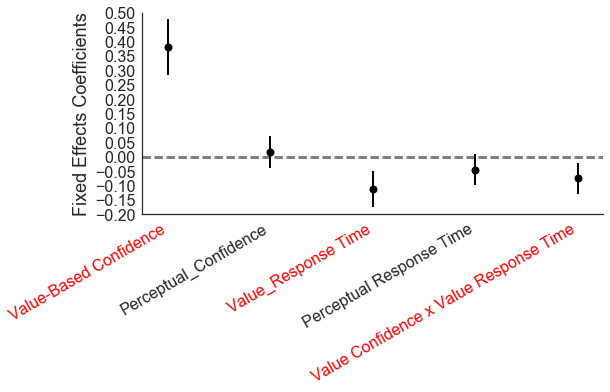

In [34]:
Coefpresplot(choice_table_exp1, title='', ticklabsize=16, size='narrow',
             ylimits=(-0.2, 0.5), ymultiple=0.05)
[i.set_color('#ff0000') for i in plt.gca().get_xticklabels()[0:1]]
[i.set_color('#ff0000') for i in plt.gca().get_xticklabels()[2:3]]
[i.set_color('#ff0000') for i in plt.gca().get_xticklabels()[4:5]]

# [Back to Content](#content)

<a id='a'></a>

# Correlations Between DDM parameter estimates in Perceptual Task and Value-Based Task:


Drift Rate, corr = 0.23 , p = 0.149 - although not significant- which may be interpreted as people who accumulates evidence fast in one task is also fast at the other.


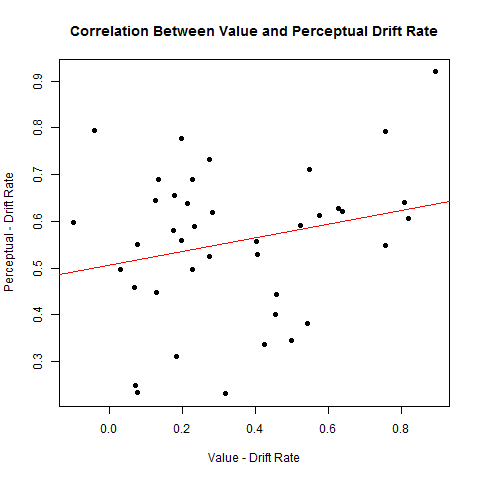

In [30]:
%%R 
fit_v <- lm(ddm[45:84,2] ~ ddm_v[45:84,2])
plot(ddm_v[45:84,2], ddm[45:84,2], main='Correlation Between Value and Perceptual Drift Rate',
     xlab='Value - Drift Rate', ylab='Perceptual - Drift Rate', pch=19)
abline(fit_v, col='red')

Threshold, corr =  0.7559787, p = 10^-8 can be interpreted in the same way the previous correlation was done.

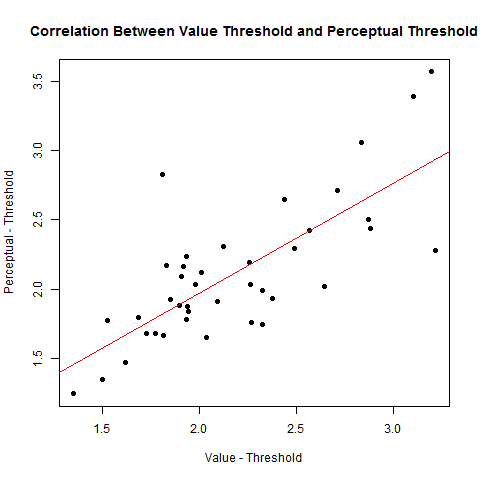

In [37]:
%%R 
fit_t <- lm(ddm[3:42,2] ~ ddm_v[3:42,2])
plot(ddm_v[3:42,2], ddm[3:42,2], main='Correlation Between Value Threshold and Perceptual Threshold',
     xlab='Value - Threshold', ylab='Perceptual - Threshold', pch=19)
abline(fit_t, col='red')

Bias, corr = 0.40, p = 0.01

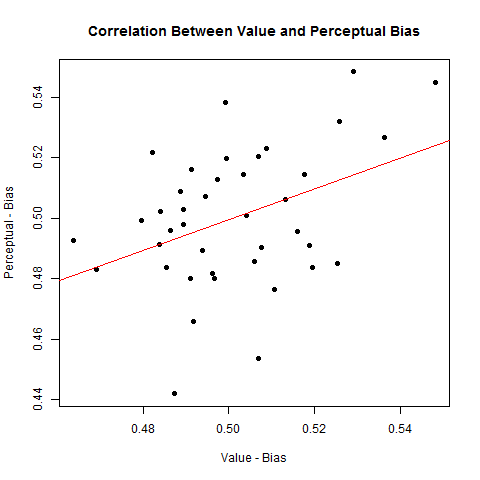

In [32]:
%%R 
fit_b <- lm(ddm[129:168,2] ~ ddm_v[129:168,2])
plot(ddm_v[129:168,2], ddm[129:168,2], main='Correlation Between Value and Perceptual Bias',
     xlab='Value - Bias', ylab='Perceptual - Bias', pch=19)
abline(fit_b, col='red')

Non-Decision Time Parameter (t), corr = 0.61, p= 2.9x10^-5

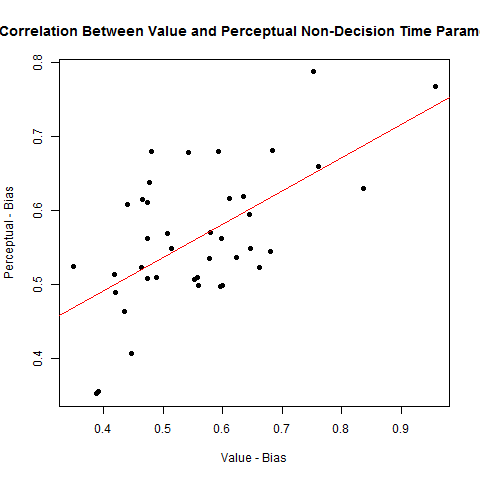

In [33]:
%%R 
fit_t <- lm(ddm[87:126,2] ~ ddm_v[87:126,2])
plot(ddm_v[87:126,2], ddm[87:126,2], main='Correlation Between Value and Perceptual Non-Decision Time Parameter',
     xlab='Value - Bias', ylab='Perceptual - Bias', pch=19)
abline(fit_t, col='red')

# [Back to Content](#content)

<a id='hddm_f'></a>
# HHDM Estimates with Bias as a Fixed Parameter

# Correlations Between DDM parameter estimates in Perceptual Task and Value-Based Task:

Threshold, as in the estimates with bias as a free parameter is positive and significant. corr= 0.75 , p= 10 ^ -8 

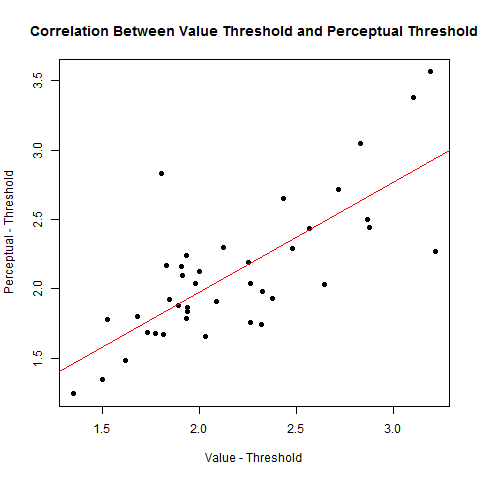

In [38]:
%%R 
fit_twb <- lm(ddm_p_wb[3:42,2] ~ ddm_v_wb[3:42,2])
plot(ddm_v_wb[3:42,2], ddm_p_wb[3:42,2], main='Correlation Between Value Threshold and Perceptual Threshold',
     xlab='Value - Threshold', ylab='Perceptual - Threshold', pch=19)
abline(fit_twb, col='red')

Drift rate, however, isn't significant but shows a positive trend. corr = 0.18, p = 0.26

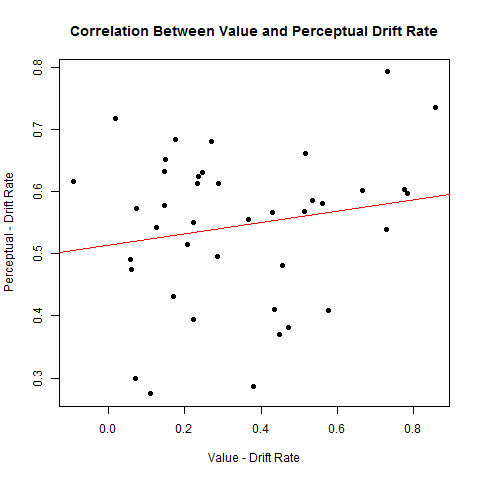

In [26]:
%%R 
fit_vwb <- lm(ddm_p_wb[45:84,2] ~ ddm_v_wb[45:84,2])
plot(ddm_v_wb[45:84,2], ddm_p_wb[45:84,2], main='Correlation Between Value and Perceptual Drift Rate',
     xlab='Value - Drift Rate', ylab='Perceptual - Drift Rate', pch=19)
abline(fit_vwb, col='red')

Non-Decision Time Parameter (t), corr = 0.61, p= 2.9x10^-5

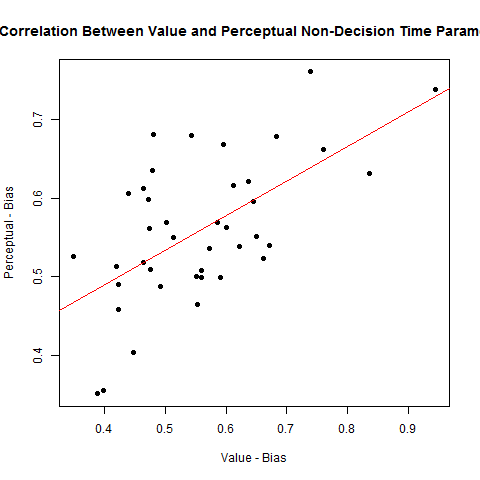

In [36]:
%%R 
fit_twb <- lm(ddm_p_wb[87:126,2] ~ ddm_v_wb[87:126,2])
plot(ddm_v_wb[87:126,2], ddm_p_wb[87:126,2], main='Correlation Between Value and Perceptual Non-Decision Time Parameter',
     xlab='Value - Bias', ylab='Perceptual - Bias', pch=19)
abline(fit_twb, col='red')

# [Back to Content](#content)

In [12]:
import numpy as np
import pandas as pd
from sklearn import linear_model # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
from scipy import stats
from scipy.stats.stats import pearsonr # Pearson's correlation
from pandas.core.frame import DataFrame as DF
from copy import copy as copy
import operator as operator
import pylab
import glob
import scipy.io as sio

# Show graphs in Notebook
%matplotlib inline

# Plotting tools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(15, 15);

# Set up interface with R
import rpy2
%load_ext rpy2.ipython

Populating the interactive namespace from numpy and matplotlib
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


C:\Users\Ecem\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [13]:
%%R
library("devtools")
library("lme4")
library("plotly")
library("LaplacesDemon")
library("ggplot2")
library("lmerTest")
library("optimx")
library("gdata")
library("Formula")
library("miscTools")
library("maxLik")
library("mlogit")
library("pbkrtest")
library("foreign")
library("MASS")
library("car")
library("tools")
library("nlme")
library('interplot')
library("lattice")
library("R.matlab")

In [14]:
%%R 
dat <- as.data.frame(read.csv('exp_final.csv', sep = ",", header = TRUE));  # load main experimental data

ddm <- as.data.frame(read.csv('ddm.csv', sep = ",", header = TRUE)) # load ddm fitting in perceptual task
#with bias as a free parameter
ddm_v <- as.data.frame(read.csv('ddm_v.csv', sep = ",", header = TRUE)) # load ddm fitting in value_based task
#with bias as a free parameter
ddm_p_wb <- as.data.frame(read.csv('ddm_p_wb.csv', sep = ",", header = TRUE)) # load ddm fitting in perceptual task
#without bias as a free parameter
ddm_v_wb <- as.data.frame(read.csv('ddm_v_wb.csv', sep = ",", header = TRUE)) # load ddm fitting in value_based task
#without bias as a free parameter

In [15]:
%R -o dat

In [16]:
def regtable(fix, fix_se, names):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose(); fixed_betas.columns = names
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax']
    return fixed_betas

In [17]:
def Coefpresplot(regtable, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='whitegrid')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=40)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0.75, len(regtable.columns) + 0.25)
        YLim = (round_to_5(regtable.loc['CImin', :].min()-0.1), round_to_5(regtable.loc['CImax', :].max()+0.2))
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        YLim = (round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.2), round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=5)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position, regtable.loc['coefficient', Coefficient], marker='o', ms=25, color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=6, color=colourlist[position-1])

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=0)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=0)
    
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=30)
    
    # Autoformats the ticklabels for the xaxis
   
    
    sns.despine()